In [12]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [14]:
movies = []
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Name',
 'Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder',
 'Werewolf by Night',
 "Marvels' Agents of S.H.I.E.L.D.",
 "Marvel's Agent Carter",
 "Marvels's Daredevil",
 'Marvel - Jessica Jones',
 "Marvel's Luke Cage",
 "Marvel's Iron Fist",
 'Marvel - The Defenders',
 'Inhumans',
 "Marvel's The Punisher",
 "Marvel's Runaways",


In [15]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Adam Beach',
 'Alaqua Cox ',
 'Alexandra Shipp',
 'Alfre Woodard',
 'Alice Braga',
 'Allegra Acosta',
 'Amber Rose Revah',
 'Andrea Roth',
 'Andrew Garfield',
 'Angelina Jolie',
 'Anna Paquin',
 'Anson Mount',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Anya Taylor-Joy',
 'Ariela Barer',
 'Aubrey Joseph',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Barnes',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Blu Hunt',
 'Boyd Holbrook',
 'Brad Pitt',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brett Dalton',
 'Brianna Hildebrand',
 'Bridget Regan',
 'Brie Larson',
 'Bruce Davison',
 'Cate Blanchett',
 'Chad Michel Murray',
 'Chadwick Boseman',
 'Charlie Cox',
 'Charlie Heaton',
 'Chiswetel Ejiofor',
 'Chloe Bennet',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Clark Gregg',
 'Colby Minifie',
 'Corey Stall',
 'Dafne Keen',
 'Danial Bruhl',
 'Danniel Bruhl',
 'Danny Huston',
 'Dave Bautista',
 'David Harbour',
 'David Tennant',
 'David Wenham'

In [16]:
G = nx.Graph()

In [17]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [18]:
with open('SENA_DataSet - MCUActorList.csv', encoding = "utf8") as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [19]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))
print(bipartite.is_bipartite_node_set(G,actor_nodes))

Actors :  ['Taika Waititi', 'Ryan Reynolds', 'Zazie Beetz', 'Charlie Cox', 'will.i.am', 'Ethan Hawke', 'Vera Farmiga', 'Oscar Isaac', 'Ian McKellen', 'Letitia Wright', 'Jessica Stroup', 'Anson Mount', 'Terrence Howard', 'Jon Favreau', 'Michael Fassbender', 'Anthony Hopkins', 'Toby Jones', 'Michael Douglas', "Vincent D'onofrio", 'Jonathan Majors', "James D'Arcy", 'Julian Dennison', 'Rachel Taylor', 'Gina Carano', 'Christian Bale', 'Ariela Barer', 'Chris Evans', 'Vinnie Jones', 'Kat Dennings', 'Gweneth Paltrow', 'Bradely Cooper', 'Virginia Gardner', 'Josh Brolin', 'Elliot Page', 'Brett Dalton', 'Hailee Steinfeld', 'Mahershala Ali', 'Sebastian Stan', 'Lyrica Okano', 'Eme Ikwuakor', 'Allegra Acosta', 'Noëlle Renée Bercy', 'Finn Jones', 'Blu Hunt', 'Kelsey Grammer', 'Martin Freeman', 'Jessica Henwick', 'Maisie Williams', 'Aubrey Joseph', 'Tessa Thompson', 'Zendaya', 'Angelina Jolie', 'Sophie Turner', 'Boyd Holbrook', 'Michael B. Jordan', 'Anna Paquin', 'Rish Shah', 'Elisabeth Olsen', 'Dafne

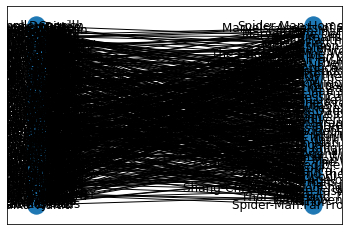

In [20]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [21]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [22]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Taika Waititi', 'Elisabeth Olsen', {'weight': 2}), ('Taika Waititi', 'Tom Holland', {'weight': 2}), ('Taika Waititi', 'Natalie Portman', {'weight': 1}), ('Taika Waititi', 'Bradley Cooper', {'weight': 2}), ('Taika Waititi', 'Brie Larson', {'weight': 2}), ('Taika Waititi', 'Jon Favreau', {'weight': 1}), ('Taika Waititi', 'Anthony Hopkins', {'weight': 1}), ('Taika Waititi', 'Anthony Mackie', {'weight': 2}), ('Taika Waititi', 'Idris Elba', {'weight': 3}), ('Taika Waititi', 'Christian Bale', {'weight': 1}), ('Taika Waititi', 'Chris Evans', {'weight': 2}), ('Taika Waititi', 'Jeremy Renner', {'weight': 2}), ('Taika Waititi', 'Gweneth Paltrow', {'weight': 2}), ('Taika Waititi', 'Chadwick Boseman', {'weight': 2}), ('Taika Waititi', 'Josh Brolin', {'weight': 2}), ('Taika Waititi', 'Chris Hemsworth', {'weight': 4}), ('Taika Waititi', 'Paul Bettany', {'weight': 1}), ('Taika Waititi', 'Benedict Cumberbatch', {'weight': 2}), ('Taika Waititi', 'Dave Bautista', {'weight': 2}), ('Taika 

In [23]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [24]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  7

{'Taika Waititi', 'Ryan Reynolds', 'Zazie Beetz', 'Charlie Cox', 'will.i.am', 'Ian McKellen', 'Vera Farmiga', 'Letitia Wright', 'Jessica Stroup', 'Terrence Howard', 'Jon Favreau', 'Michael Fassbender', 'Anthony Hopkins', 'Toby Jones', 'Michael Douglas', 'Jonathan Majors', "Vincent D'onofrio", "James D'Arcy", 'Julian Dennison', 'Rachel Taylor', 'Gina Carano', 'Christian Bale', 'Vinnie Jones', 'Chris Evans', 'Ariela Barer', 'Kat Dennings', 'Gweneth Paltrow', 'Bradely Cooper', 'Virginia Gardner', 'Josh Brolin', 'Elliot Page', 'Brett Dalton', 'Hailee Steinfeld', 'Mahershala Ali', 'Sebastian Stan', 'Lyrica Okano', 'Allegra Acosta', 'Finn Jones', 'Kelsey Grammer', 'Martin Freeman', 'Jessica Henwick', 'Tessa Thompson', 'Zendaya', 'Boyd Holbrook', 'Sophie Turner', 'Michael B. Jordan', 'Anna Paquin', 'Rish Shah', 'Elisabeth Olsen', 'Dafne Keen', 'Kathryn Hahn', 'Stan Lee', 'Danny Huston', 'Natalie Portman', 'James Marsden', 'Rila Fukushima', 'Halle Berry', '